In [1]:
import pandas as pd
import numpy as np
import pathlib
from scipy import constants
from pprint import pprint
import matplotlib.pyplot as plt
if True:
    import sys
    sys.path.append("/home/salmon/workspace/fytok/python")
    sys.path.append("/home/salmon/workspace/SpDB/python")
    sys.path.append("/home/salmon/workspace/SpView/python")

    from fytok.load_profiles import (load_core_profiles, load_core_source,
                                     load_core_transport, load_equilibrium)
    from fytok.modules.transport.Equilibrium import Equilibrium
    from fytok.numlib.smooth import rms_residual
    from spdm.data import File, Function, Query
    from spdm.logger import logger
    from spdm.view.plot_profiles import plot_profiles, sp_figure


###########################


In [2]:
eqdsk_file = File(
    "/home/salmon/workspace/data/15MA inductive - burn/Standard domain R-Z/High resolution - 257x513/g900003.00230_ITER_15MA_eqdsk16HR.txt", format="geqdsk").read()
desc = load_equilibrium(eqdsk_file,
                        coordinate_system={
                            "psi_norm": np.linspace(0.0,  0.995, 128),
                            "theta": 64},
                        code={"name": "dummy"},
                        boundary={"psi_norm": 0.995}
                        )
eq = Equilibrium(desc)
psi_norm = np.linspace(0.0, 0.995, 32)


2022-11-08 15:20:34,974 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/sp_export.py:101:sp_find_module_by_name: Load module spdm.plugins.data.file.PluginGEQdsk
2022-11-08 15:20:34,975 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open GEQdskFile: /home/salmon/workspace/data/15MA inductive - burn/Standard domain R-Z/High resolution - 257x513/g900003.00230_ITER_15MA_eqdsk16HR.txt mode='r'
2022-11-08 15:20:34,977 DEBUG [spd] /home/salmon/workspace/fytok/python/spdm/plugins/data/file/PluginGEQdsk.py:286:__init__: Open File /home/salmon/workspace/data/15MA inductive - burn/Standard domain R-Z/High resolution - 257x513/g900003.00230_ITER_15MA_eqdsk16HR.txt mode=r
2022-11-08 15:20:35,091 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/sp_export.py:101:sp_find_module_by_name: Load module fymodules.transport.equilibrium.dummy


In [3]:
eq.boundary.outline

TypeError: only size-1 arrays can be converted to Python scalars

In [3]:
eqdsk_file = File("/home/salmon/workspace/fytok/examples/test.geqdsk", mode="w",format="geqdsk").write(eq)

2022-11-08 15:17:01,763 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open GEQdskFile: /home/salmon/workspace/fytok/examples/test.geqdsk mode='w'
2022-11-08 15:17:01,769 DEBUG [spd] /home/salmon/workspace/fytok/python/spdm/plugins/data/file/PluginGEQdsk.py:286:__init__: Open File /home/salmon/workspace/fytok/examples/test.geqdsk mode=w


/fuyun/software/SciPy-bundle/2020.11-foss-2020b/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: only size-1 arrays can be converted to Python scalars

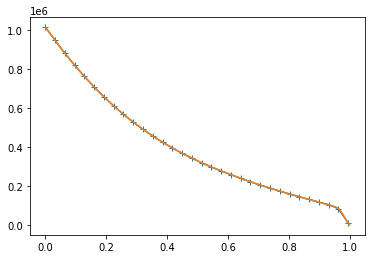

In [5]:
plt.plot(psi_norm, eq.profiles_1d.pressure(psi_norm),"+-")
plt.plot(eq.profiles_1d._predefined_psi_norm, eq.profiles_1d.pressure())


/fuyun/software/SciPy-bundle/2020.11-foss-2020b/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


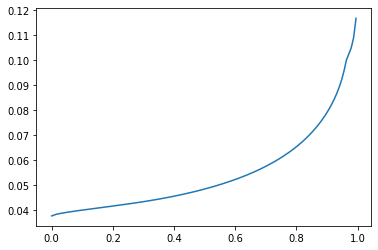

In [6]:
plt.plot(eq.coordinate_system.psi_norm, eq.coordinate_system.gm6)

2022-09-16 16:16:50,384 WARNING [spd] /home/salmon/workspace/fytok/python/fytok/modules/transport/MagneticCoordSystem.py:682:phi_boundary: FIXME: psi_norm boudnary is 0.995 != 1.0 


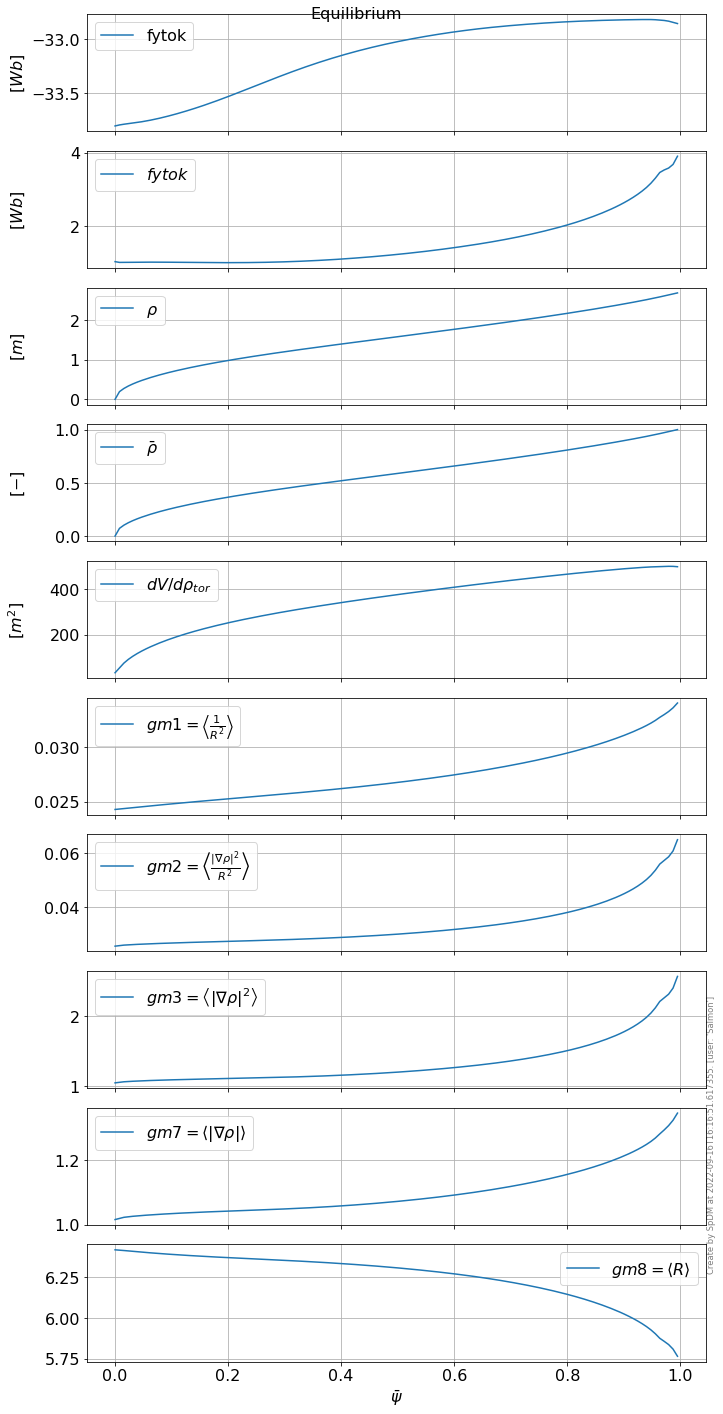

In [7]:
magnetic_surface = eq.coordinate_system

fig=plot_profiles(
            [
                [
                    # (bs_eq_fpol, "astra", r"$F_{pol} [Wb\cdot m]$", bs_line_style),
                    (magnetic_surface.fpol,  r"fytok", r"$[Wb]$"),
                ],

                [
                    # (Function(bs_psi_norm, profiles["q"].values), r"astra", r"$q [-]$", bs_line_style),
                    # (Function(eqdsk.get('profiles_1d.psi_norm'), eqdsk.get('profiles_1d.q')), "eqdsk"),
                    (magnetic_surface.q,  r"$fytok$", r"$[Wb]$"),
                    # (magnetic_surface.dphi_dpsi,  r"$\frac{d\phi}{d\psi}$", r"$[Wb]$"),
                ],
                [
                    # (Function(bs_psi_norm, profiles["rho"].values), r"astra", r"$\rho_{tor}[m]$",  bs_line_style),
                    (magnetic_surface.rho_tor,  r"$\rho$", r"$[m]$"),
                ],
                [
                    # (Function(bs_psi_norm, profiles["x"].values),           r"astra",
                    #  r"$\frac{\rho_{tor}}{\rho_{tor,bdry}}$", bs_line_style),
                    (magnetic_surface.rho_tor_norm,
                     r"$\bar{\rho}$", r"$[-]$"),
                ],

                [
                    # (Function(bs_psi_norm, 4*(constants.pi**2) * R0 * profiles["rho"].values),
                    #  r"$4\pi^2 R_0 \rho$", r"$4\pi^2 R_0 \rho$",  bs_line_style),
                    (magnetic_surface.dvolume_drho_tor,
                     r"$dV/d\rho_{tor}$", r"$[m^2]$"),
                ],

                # (magnetic_surface.dvolume_dpsi, r"$\frac{dV}{d\psi}$"),

                # [
                #     (magnetic_surface.volume, r"$V$  from $\psi$"),
                #     # (magnetic_surface.volume1, r"$V$ from $\rho_{tor}$"),
                # ],



                # (magnetic_surface.psi,  r"$\psi$", r"$[Wb]$"),
                # (magnetic_surface.phi,  r"$\phi$", r"$[Wb]$"),
                # (magnetic_surface.psi_norm,  r"$\bar{\psi}$", r"$[-]$"),


                # [
                #     (magnetic_surface.dpsi_drho_tor,
                #      r"$\frac{d\psi}{d\rho_{tor}}$", "", {"marker": '.'}),
                #     (magnetic_surface.dvolume_drho_tor/magnetic_surface.dvolume_dpsi,
                #      r"$\frac{dV}{d\rho_{tor}} / \frac{dV}{d\psi}$")
                # ],
                # (magnetic_surface.drho_tor_dpsi*magnetic_surface.dpsi_drho_tor,
                #  r"$\frac{d\rho_{tor}}{d\psi} \cdot \frac{d\psi}{d\rho_{tor}}$"),
                # (magnetic_surface.gm2_,
                #  r"$gm2_=\left<\frac{\left|\nabla \rho\right|^2}{R^2}\right>$"),
                # (magnetic_surface.dpsi_drho_tor, r"$\frac{d\rho_{tor}}{d\psi}$", "", {"marker": "."}),


                (magnetic_surface.gm1, r"$gm1=\left<\frac{1}{R^2}\right>$"),
                (magnetic_surface.gm2, r"$gm2=\left<\frac{\left|\nabla \rho\right|^2}{R^2}\right>$"),
                (magnetic_surface.gm3, r"$gm3=\left<\left|\nabla \rho\right|^2\right>$"),
                (magnetic_surface.gm7, r"$gm7=\left<\left|\nabla \rho\right|\right>$"),
                (magnetic_surface.gm8, r"$gm8=\left<R\right>$"),

                # (magnetic_surface.dphi_dpsi,                                                  r"$\frac{d\phi}{d\psi}$"),
                # (magnetic_surface.dpsi_drho_tor,                                        r"$\frac{d\psi}{d\rho_{tor}}$"),
            ],
            # x_axis=(magnetic_surface.rho_tor_norm,      r"$\bar{\rho}_{tor}$"),
            x_axis=(magnetic_surface.psi_norm,      r"$\bar{\psi}$"),
            title="Equilibrium",
            grid=True, fontsize=16) 